In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df = pd.read_csv('diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [58]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [59]:
df.columns = [ 'length' if col=='x' else
               'width'  if col=='y' else
               'height'  if col=='z' else col
               for col in df.columns ]

In [60]:
df.duplicated().sum()

146

In [61]:
df = df.drop_duplicates()

In [62]:
df

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   length   53794 non-null  float64
 8   width    53794 non-null  float64
 9   height   53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [64]:
df.duplicated().sum()

0

In [74]:
df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17552\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [75]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

In [76]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [77]:
num_cols

Index(['carat', 'depth', 'table', 'price', 'length', 'width', 'height'], dtype='object')

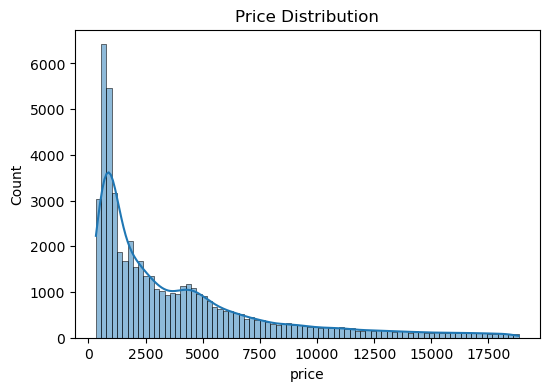

In [78]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

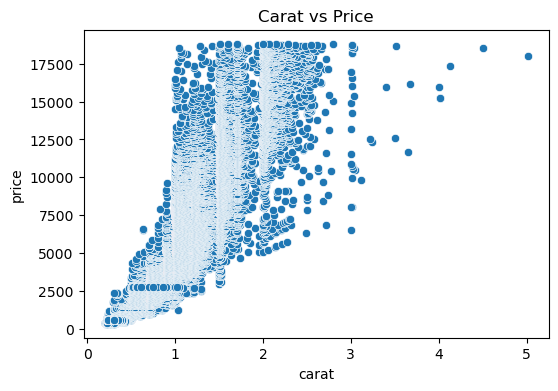

In [79]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['carat'], y=df['price'])
plt.title("Carat vs Price")
plt.show()

In [80]:
df[num_cols].reset_index()

,index,carat,depth,table,price,length,width,height
0,0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53789,53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53790,53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53791,53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53792,53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


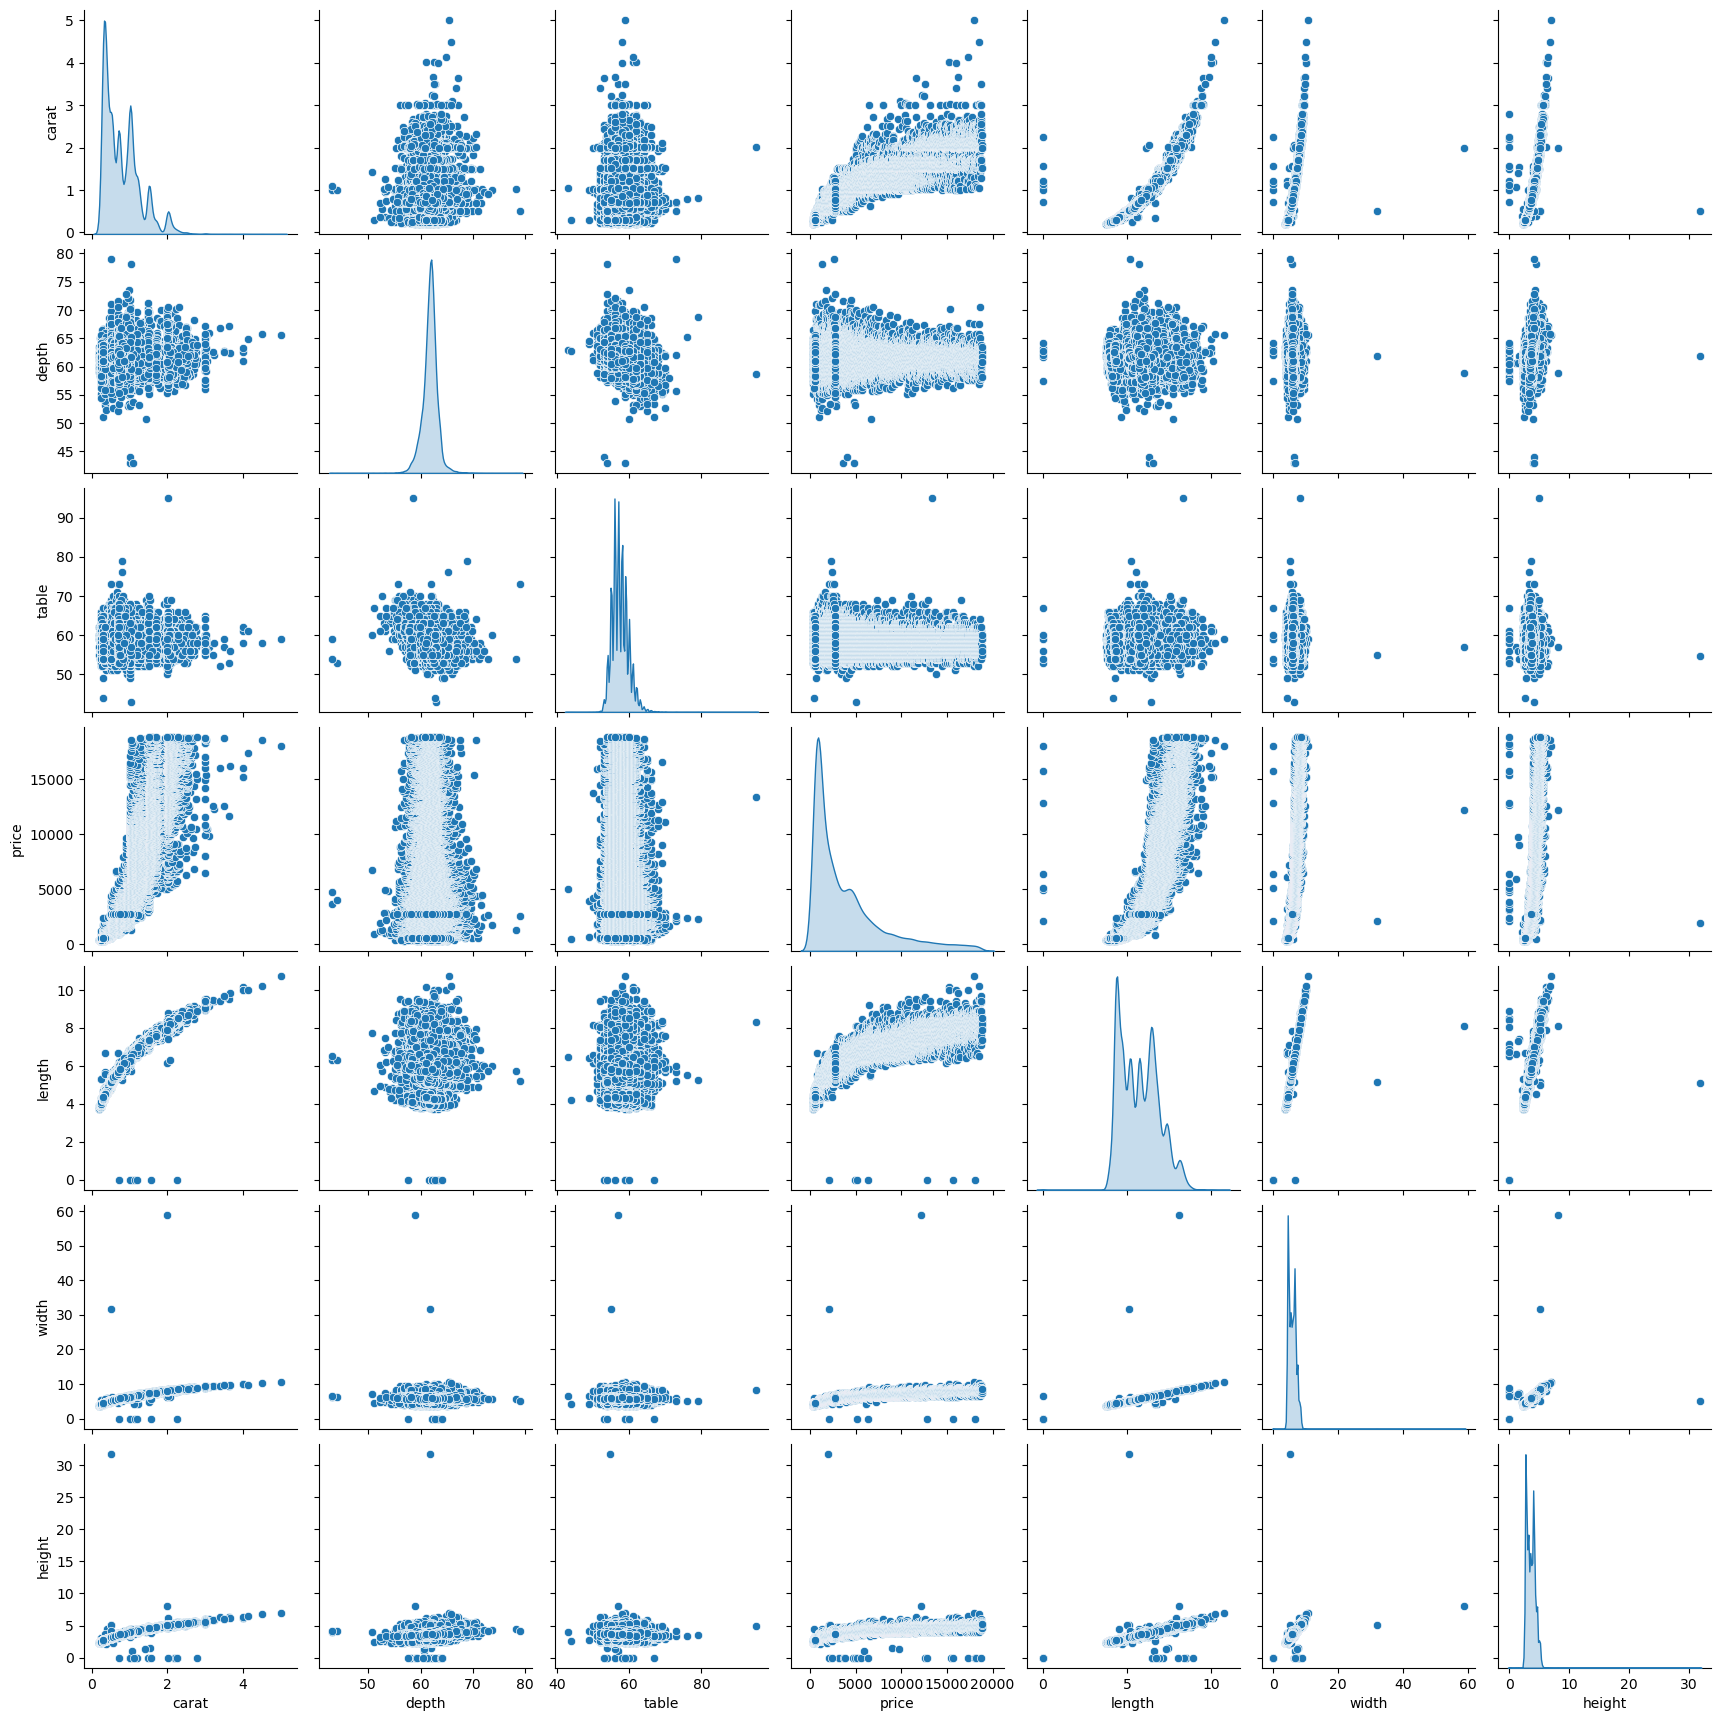

In [81]:
sns.pairplot(data = df[num_cols], diag_kind = 'kde')
plt.show()

In [93]:
for i , j in enumerate(cols):
    print(i,j)

0 carat
1 depth
2 table
3 length
4 width
5 height


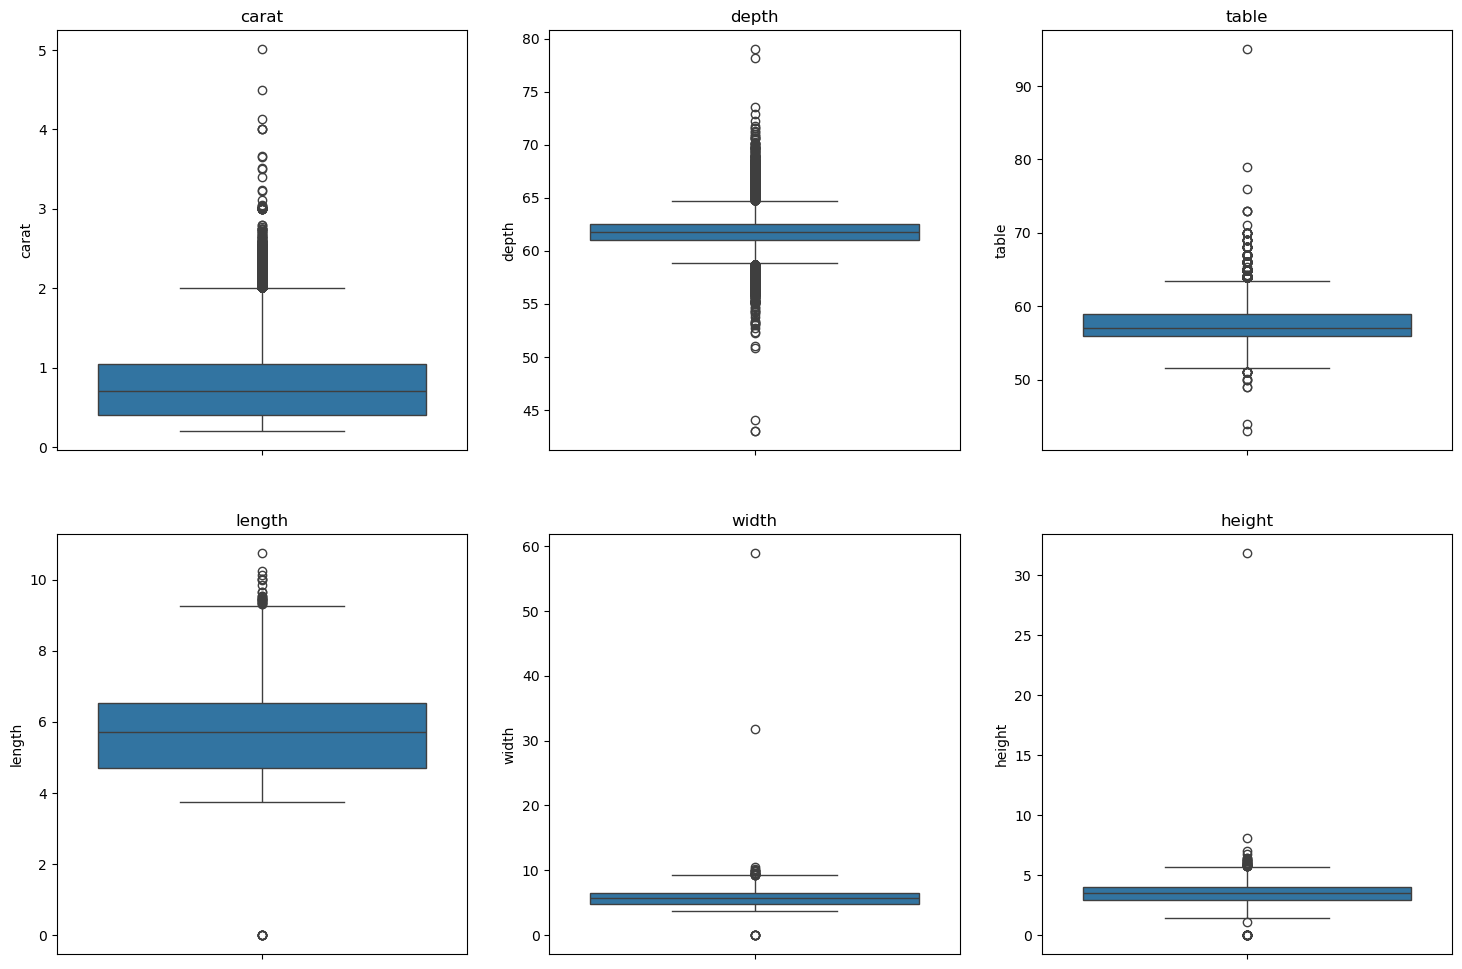

In [84]:
## categoircal Visualisation
cols = ['carat', 'depth', 'table', 'length', 'width', 'height']
fig, axes = plt.subplots(2,3, figsize=(18,12))
axes = axes.ravel()
for ax, col in  enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[ax])
    axes[ax].set_title(col)

In [85]:

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


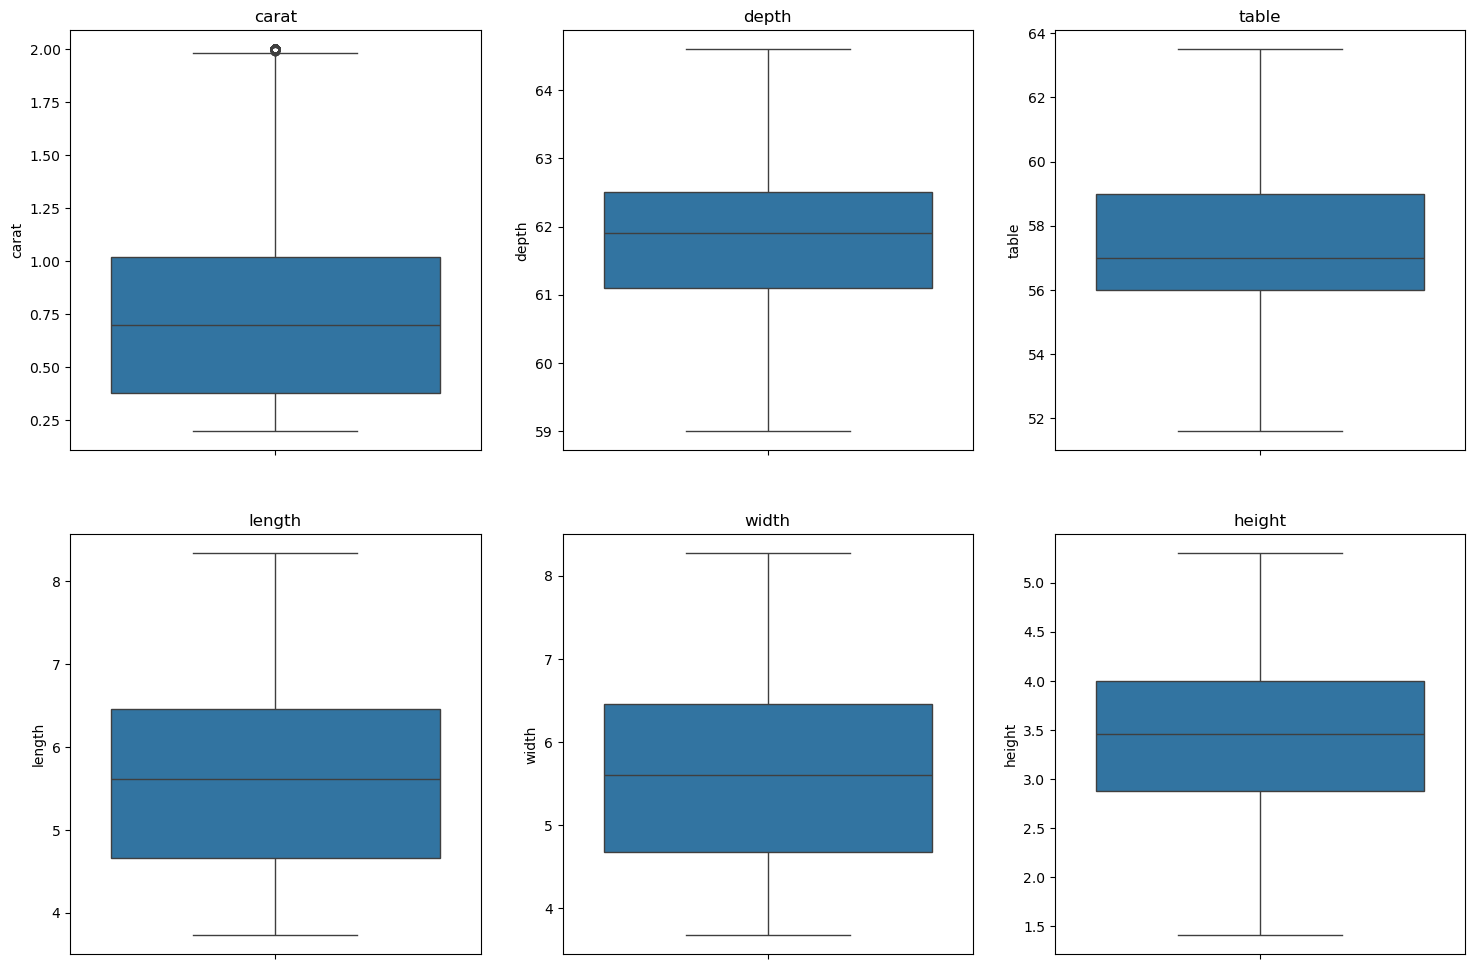

In [86]:
## categoircal Visualisation
cols = ['carat', 'depth', 'table', 'length', 'width', 'height']
fig, axes = plt.subplots(2,3, figsize=(18,12))
axes = axes.ravel()
for ax, col in  enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[ax])
    axes[ax].set_title(col)

In [89]:
df = df[(df['length']>0) & (df['width']>0) & (df['height']>0)]

In [90]:
df

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [94]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ['cut','color','clarity']
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

In [95]:
df

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4.0,6.0,7.0,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1.0,0.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4.0,0.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3.0,4.0,3.0,61.0,58.0,2757,6.15,6.12,3.74


In [96]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [97]:
X_train.shape

(39028, 9)

In [98]:
X_test.shape

(9758, 9)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor()
}
results = {}

for name, model in models.items():
    if name in ["Linear Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = [train_rmse, test_rmse, train_r2, test_r2]

    print(f"Model: {name}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test  RMSE: {test_rmse:.2f}")
    print(f"Train R2: {train_r2:.3f}")
    print(f"Test  R2: {test_r2:.3f}")
    print("-"*55)

Model: Linear Regression
Train RMSE: 1188.04
Test  RMSE: 1194.31
Train R2: 0.881
Test  R2: 0.876
-------------------------------------------------------
Model: KNN
Train RMSE: 598.37
Test  RMSE: 760.48
Train R2: 0.970
Test  R2: 0.950
-------------------------------------------------------
Model: Decision Tree
Train RMSE: 5.99
Test  RMSE: 607.58
Train R2: 1.000
Test  R2: 0.968
-------------------------------------------------------
Model: Random Forest
Train RMSE: 168.58
Test  RMSE: 450.39
Train R2: 0.998
Test  R2: 0.982
-------------------------------------------------------
Model: Gradient Boosting
Train RMSE: 531.95
Test  RMSE: 549.74
Train R2: 0.976
Test  R2: 0.974
-------------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [1, 'sqrt'],
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                         
    n_jobs=-1,                    
    verbose=2,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearch:")
print(grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n=== Tuned Random Forest (GridSearch) ===")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test  RMSE: {test_rmse:.2f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Test  R²: {test_r2:.3f}")